# Etude statistique du dataset
Lien vers le dataset que nous avons choisi :


In [1]:
# Installation des librairies nécessaires :
! pip install pandas
! pip install matplotlib
! pip install pillow

In [2]:
# On a un fichier de texte parent_child_rel.txt contenant des informations les informations suivantes :
# {id du style architectural parent} {id du style architectural enfant}

# On a un autre fichier style_names.txt contenant :
# {id du style architectural} {nom du style architectural}

# On souhaite créer un dataframe contenant :
# -id du style architectural parent
# -nom du style architectural parent
# -id du style architectural enfant
# -nom du style architectural enfant

parent_child_rel = '../dataset_doc/parent_child_rel.txt'
style_names = '../dataset_doc/style_names.txt'

import pandas as pd

def get_parent_child_rel(rel_file, names_file):
    # On ouvre le fichier contenant les relations parent-enfant
    with open(rel_file, 'r') as f:
        rel = f.readlines()
    # On ouvre le fichier contenant les noms des styles architecturaux
    with open(names_file, 'r') as f:
        names = f.readlines()

    # On crée un dictionnaire contenant l'id et le nom des styles architecturaux
    names_dict = {}
    for name in names:
        name = name.split()
        names_dict[name[0]] = name[1]

    # On crée un dict contenant les relations parent-enfant
    rel_dict = {}
    for relation in rel:
        relation = relation.split()
        rel_dict[relation[0]] = relation[1]

    # On crée un dataframe contenant les relations parent-enfant avec deux colonnes : parent et child
    df = pd.DataFrame.from_dict(rel_dict, orient='index',columns=['child_id']).reset_index()
    # On renomme la colonne index en parent_id
    df = df.rename(columns={'index':'parent_id'})

    # On ajoute une colonne contenant le nom du style architectural enfant
    df['child_name'] = df['child_id'].map(names_dict)


    # On ajoute une colonne contenant le nom du style architectural parent
    df['parent_name'] = df['parent_id'].map(names_dict)

    # On réarrange les colonnes selon cet ordre : parent_id, parent_name, child_id, child_name
    df = df[['parent_id', 'parent_name', 'child_id', 'child_name']]

    # On retourne le dataframe
    return df
    


In [3]:
# On crée un dataframe contenant les relations parent-enfant
df_rel = get_parent_child_rel(parent_child_rel, style_names)
display(df_rel.head())

,parent_id,parent_name,child_id,child_name
0,Q750752,English,Q15609295,Perpendicular
1,Q176483,Gothic,Q695863,Brick
2,Q236122,Renaissance,Q502163,Renaissance
3,Q840829,Baroque,Q21564105,Rococo
4,Q46261,Romanesque,Q744373,Romanesque


In [4]:
test_txt = '../sets/wc4_test.txt'
train_txt = '../sets/wc4_train.txt'
trainval_txt = '../sets/wc4_trainval.txt'
val_txt = '../sets/wc4_val.txt'

# Chacun des fichiers texte ci-dessus contient :
#{nom du fichier image} {id du style architectural enfant}

In [5]:
# On créé une fonction qui prend en argument un fichier texte et qui retourne un dataframe contenant :
# -le nom du fichier image
# -l'id du style architectural parent

def get_img_parent_style(txt_file):
    # On ouvre le fichier texte
    with open(txt_file, 'r') as f:
        txt = f.readlines()

    # On crée un dictionnaire contenant le nom du fichier image et l'id du style architectural enfant
    txt_dict = {}
    for line in txt:
        line = line.split()
        txt_dict[line[0]] = line[1]

    # On crée un dataframe à partir du dictionnaire
    df_in = pd.DataFrame.from_dict(txt_dict, orient='index',columns=['parent_id']).reset_index()
    # On renomme la colonne index en img_name
    df_in = df_in.rename(columns={'index':'img_name'})

    # On compare les id du style architectural parent avec ceux du dataframe contenant les relations parent-enfant et on ajoute une colonne contenant le nom du style architectural parent
    df_in['parent_name'] = df_in['parent_id'].map(df_rel.set_index('parent_id')['parent_name'])

    # On retourne le dataframe
    return df_in

In [6]:
print('train set')
df_train = get_img_parent_style(train_txt)
display(df_train.head())
display(df_train.tail())

print('train eval set')
df_trainval = get_img_parent_style(trainval_txt)
display(df_trainval.head())
display(df_train.tail())

print('eval set')
df_val = get_img_parent_style(val_txt)
display(df_val.head())
display(df_train.tail())

print('test set')
df_test = get_img_parent_style(test_txt)
display(df_test.head())
display(df_train.tail())

train set


,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


train eval set


,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


eval set


,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


test set


,img_name,parent_id,parent_name
0,Q2588857_wd0.jpg,Q840829,Baroque
1,Q626388_wd0.jpg,Q840829,Baroque
2,Q11985244_wd0.jpg,Q840829,Baroque
3,Q1561401_wd0.jpg,Q840829,Baroque
4,Q8406909_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


,style_name,count
0,Gothic,3041
1,Romanesque,1653
2,Baroque,1080
3,Renaissance,64


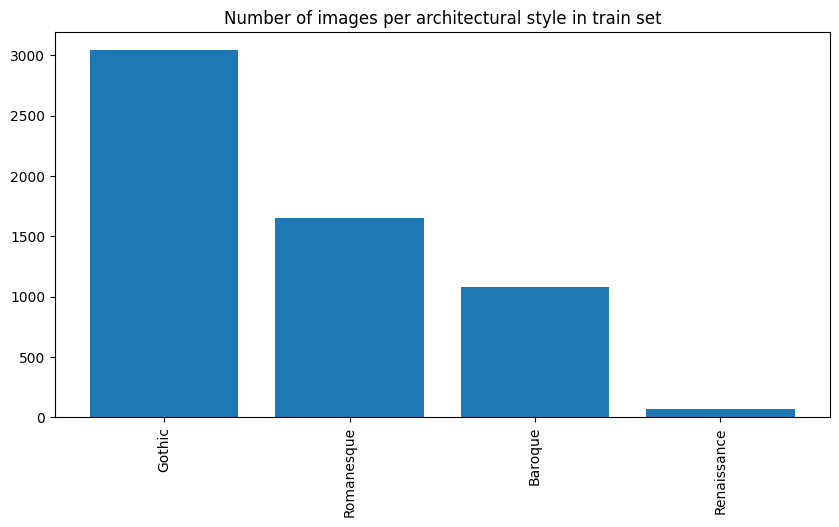

,style_name,count
0,Gothic,3093
1,Romanesque,1703
2,Baroque,1132
3,Renaissance,116


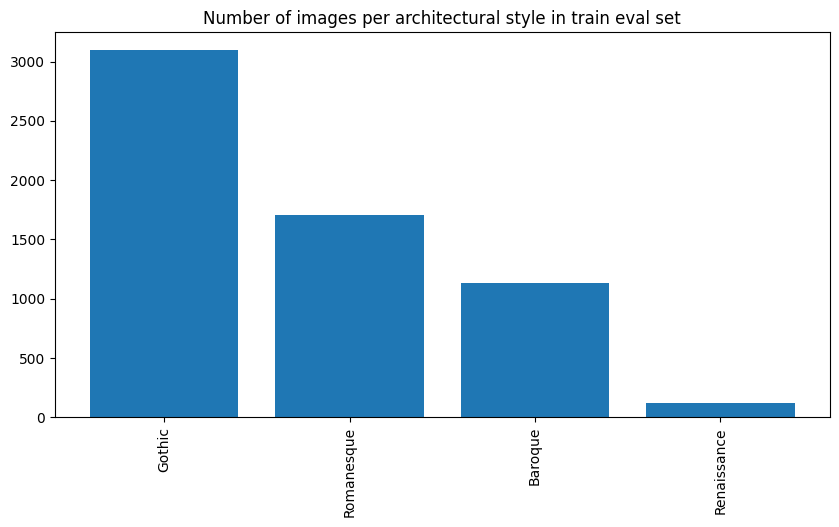

,style_name,count
0,Baroque,52
1,Renaissance,52
2,Gothic,52
3,Romanesque,50


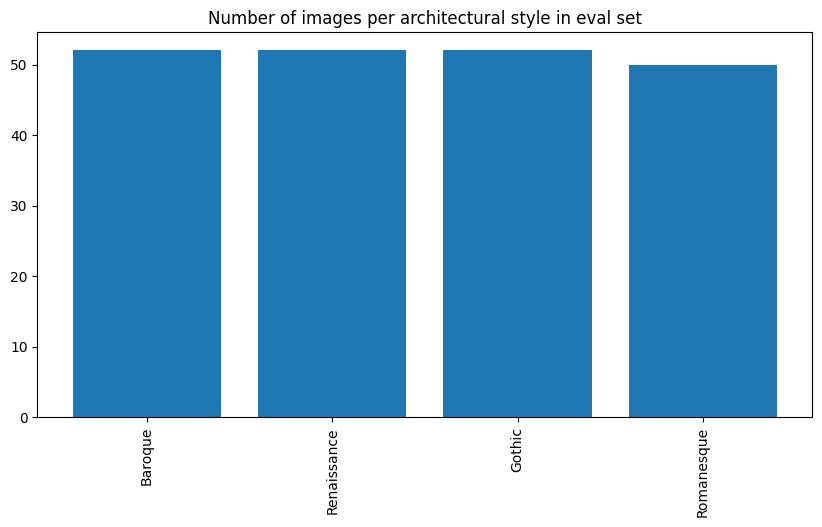

,style_name,count
0,Gothic,506
1,Romanesque,504
2,Baroque,372
3,Renaissance,100


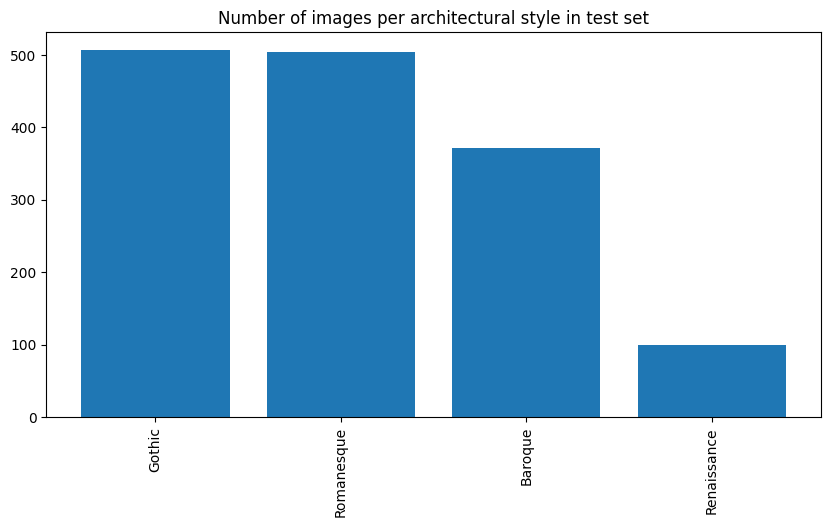

In [7]:
# On souhaite visualiser la distribution des styles architecturaux dans les différents sets
import matplotlib.pyplot as plt

# On souhaite aussi visualiser le nombre exact d'images par style architectural
def plot_style_distribution(df, set_name):
    # On crée un dictionnaire contenant le nombre d'images par style architectural
    style_count = df['parent_name'].value_counts().to_dict()

    # On crée un dataframe à partir du dictionnaire
    df_count = pd.DataFrame.from_dict(style_count, orient='index',columns=['count']).reset_index()
    # On renomme la colonne index en style_name
    df_count = df_count.rename(columns={'index':'style_name'})

    # On trie le dataframe par ordre décroissant
    df_count = df_count.sort_values(by='count', ascending=False)

    # On affiche le nombre d'images par style architectural
    display(df_count)

    # On affiche le nombre d'images par style architectural sous forme de diagramme en bâtons
    plt.figure(figsize=(10,5))
    plt.bar(df_count['style_name'], df_count['count'])
    plt.title(f'Number of images per architectural style in {set_name} set')
    plt.xticks(rotation=90)
    plt.show()

plot_style_distribution(df_train, 'train')
plot_style_distribution(df_trainval, 'train eval')
plot_style_distribution(df_val, 'eval')
plot_style_distribution(df_test, 'test')

In [8]:
# On regroupe tous les sets dans un seul dataframe
df_concat_sets = pd.concat([df_train, df_trainval, df_val, df_test])
display(df_concat_sets.head())

,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


,style_name,count
0,Gothic,6692
1,Romanesque,3910
2,Baroque,2636
3,Renaissance,332


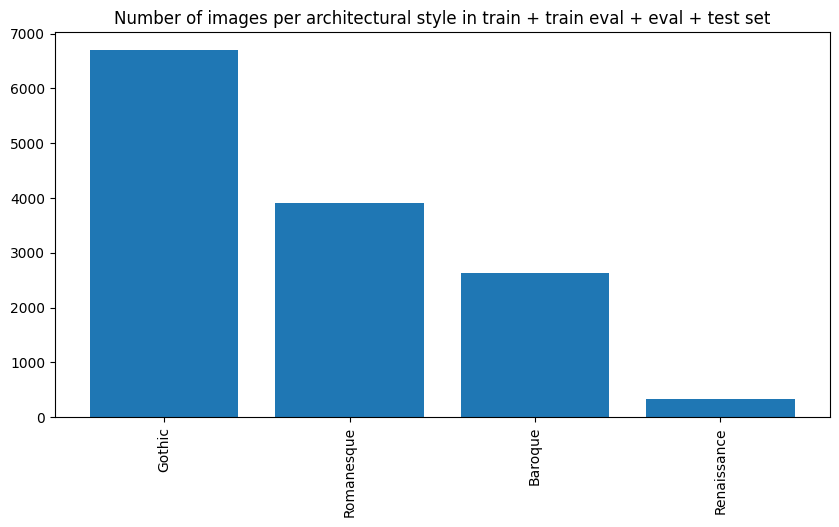

In [9]:
# On souhaite visualiser la distribution des styles architecturaux dans tous les sets
plot_style_distribution(df_concat_sets, 'train + train eval + eval + test')


# Tests avec un modèle de classification d'image

In [10]:
# chemin vers le dataset :
dataset_path = '../../DATASET/images/'

## Compression des images

In [11]:
# Nos images sont stockées dans un dossier images/images
# Ces images pèsent bien trop lourd pour être transformées en tenseurs et être traitées par le modèle
# On va donc les réduire à une taille de 256x256 pixels
# On va aussi les normaliser en divisant les valeurs des pixels par 255

# On sauvegarde les images dans un dossier images/images_256

# On crée une fonction qui prend en argument un dataframe et qui sauvegarde les images dans un dossier images/images_256

import os
from PIL import Image

def save_images(df):
    # On crée un dossier images/images_256 s'il n'existe pas déjà
    if not os.path.exists(dataset_path + 'images_256'):
        os.makedirs(dataset_path + 'images_256')

    # On sauvegarde les images dans le dossier images/images_256
    for index, row in df.iterrows():
        img_name = row['img_name']
        img = Image.open(dataset_path + 'images/' + img_name)
        img = img.resize((256, 256))
        img.save(dataset_path + 'images_256/' + img_name)



In [12]:
# On sauvegarde les images du train set
#save_images(df_train)


In [13]:
# On sauvegarde les images du train eval set
#save_images(df_trainval)

In [14]:
# On sauvegarde les images du eval set
#save_images(df_val)

In [15]:
# On sauvegarde les images du test set
#save_images(df_test)

In [16]:
! pip install torch

In [17]:
! pip install torchvision

In [18]:
# On transforme les images en tenseurs avec tensorflow
import torch
from torchvision import transforms
from PIL import Image

# On crée une fonction qui prend en argument le chemin vers une image et qui retourne un tenseur
def img_to_tensor(img_path):
    # On ouvre l'image
    img = Image.open(img_path)
    # On transforme l'image en tenseur
    img_tensor = transforms.ToTensor()(img)
    # On retourne le tenseur
    return img_tensor

# On crée une fonction qui prend en argument un dataframe et qui retourne un dictionnaire contenant le nom du fichier image et le tenseur correspondant
def get_img_tensor_dict(df):
    # On crée un dictionnaire vide
    img_tensor_dict = {}
    # On parcourt le dataframe
    for index, row in df.iterrows():
        # On crée le chemin vers l'image
        img_path = dataset_path +'images_256/'+ row['img_name']
        # On transforme l'image en tenseur
        img_tensor = img_to_tensor(img_path)
        # On ajoute le nom du fichier image et le tenseur correspondant au dictionnaire
        img_tensor_dict[row['img_name']] = img_tensor
    # On retourne le dictionnaire
    return img_tensor_dict





On crée un dictionnaire contenant le nom du fichier image et le tenseur correspondant pour chaque set

In [19]:
img_tensor_dict_train = get_img_tensor_dict(df_train)

In [20]:
img_tensor_dict_trainval = get_img_tensor_dict(df_trainval)

In [21]:
img_tensor_dict_val = get_img_tensor_dict(df_val)

In [22]:
img_tensor_dict_test = get_img_tensor_dict(df_test)

In [23]:
# On visualise un exemple de tenseur
print('train set')
print('img_name :', df_val['img_name'][0])
print('img_tensor :')
display(img_tensor_dict_val[df_val['img_name'][0]])

train set
img_name : Q1415669_wd1.jpg
img_tensor :


tensor([[[0.0902, 0.0941, 0.1020,  ..., 0.2392, 0.2980, 0.3176],
         [0.0706, 0.0824, 0.1255,  ..., 0.0980, 0.1804, 0.3059],
         [0.1294, 0.0824, 0.0627,  ..., 0.1020, 0.1725, 0.3216],
         ...,
         [0.3294, 0.3686, 0.4745,  ..., 0.5255, 0.4706, 0.3333],
         [0.3961, 0.5059, 0.6000,  ..., 0.3569, 0.2588, 0.1647],
         [0.5490, 0.5608, 0.6314,  ..., 0.1804, 0.0824, 0.1255]],

        [[0.1176, 0.1216, 0.1412,  ..., 0.2353, 0.2784, 0.2980],
         [0.0980, 0.1098, 0.1647,  ..., 0.0941, 0.1686, 0.2863],
         [0.1569, 0.1098, 0.1020,  ..., 0.0980, 0.1608, 0.3098],
         ...,
         [0.3216, 0.3686, 0.4627,  ..., 0.4627, 0.3961, 0.2706],
         [0.3804, 0.4941, 0.5804,  ..., 0.3020, 0.1961, 0.1059],
         [0.5333, 0.5412, 0.6118,  ..., 0.1255, 0.0235, 0.0667]],

        [[0.1412, 0.1451, 0.1490,  ..., 0.2588, 0.3059, 0.3255],
         [0.1216, 0.1333, 0.1725,  ..., 0.1176, 0.1961, 0.3137],
         [0.1804, 0.1333, 0.1098,  ..., 0.1294, 0.1961, 0.

## Modèle personnalisé - Avec Pytorch

In [24]:
! pip install scikit-learn